# YouTube Analytics — Project
**Objective:** Clean, explore, and model the dataset to predict Estimated Revenue (USD) and find key drivers of engagement and monetization.



In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
sns.set_style("whitegrid")


In [2]:
df = pd.read_csv('/content/youtube_channel_real_performance_analytics.csv')

print("Loaded dataset. Shape:", df.shape)
df.head(8)


Loaded dataset. Shape: (364, 70)


,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),Ad Impressions,Estimated AdSense Revenue (USD),DoubleClick Revenue (USD),YouTube Ads Revenue (USD),Watch Page Ads Revenue (USD),YouTube Premium (USD),Transaction Revenue (USD),Transactions,Revenue from Transactions (USD),Reactions,Chat Messages Count,Reminders Set,Stream Hours,Remix Views,Remix Count,Subscribers from Posts,New Comments,Shares,Like Rate (%),Dislikes,Likes,Unsubscribes,New Subscribers,Returned Items (USD),Unconfirmed Commissions (USD),Approved Commissions (USD),Orders,Total Sales Volume (USD),End Screen Click-Through Rate (%),End Screen Impressions,End Screen Clicks,Teaser Click-Through Rate (%),Teaser Impressions,Teaser Clicks,Card Click-Through Rate (%),Card Impressions,Card Clicks,Views per Playlist Start,Playlist Views,Playlist Watch Time (hours),Clip Watch Time (hours),Clip Views,YouTube Premium Watch Time (hours),YouTube Premium Views,Returning Viewers,New Viewers,Average Views per User,Unique Viewers,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,1.386,1.021,981.0,0.527,0.024,1.002,0.551,0.010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,12.0,96.86,30.0,924.0,3.0,54.0,0.0,0.0,0.0,0.0,0.0,4.35,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3333,10.0,0.2974,0.1575,10.0,2.5358,152.0,0.0,0.0,0.0,0.0,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,1.612,1.361,861.0,0.635,0.009,1.172,0.645,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,5.0,94.71,18.0,322.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5000,7.0,0.5187,0.0000,0.0,0.8911,32.0,0.0,0.0,0.0,0.0,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,2.105,1.818,88.0,0.088,0.000,0.160,0.088,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,92.28,20.0,239.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,11.0,0.1683,0.0000,0.0,0.1838,28.0,0.0,0.0,0.0,0.0,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,1.667,0.857,35.0,0.016,0.000,0.030,0.016,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,7.0,94.02,14.0,220.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6667,20.0,0.0640,0.0000,0.0,0.0711,20.0,0.0,0.0,0.0,0.0,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,7.0,76.98,180.0,602.0,3.0,31.0,0.0,0.0,0.0,0.0,0.0,0.00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6667,10.0,0.0611,0.0000,0.0,0.2519,39.0,0.0,0.0,0.0,0.0,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62
5,5,496.0,2016-07-08 00:00:00,7,8,7,2016,Friday,0.036,491.0,1.122,0.819,673.0,0.291,0.012,0.551,0.303,0.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,3.0,94.46,17.0,290.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0000,10.0,0.5130,0.0000,0.0,0.5130,22.0,0.0,0.0,0.0,0.0,0.0,0.0,36.70,182.0,8415.0,425.4773,19.0,0.305,40395.0,5.09
6,6,9.0,2016-08-05 00:00:00,28,5,8,2016,Friday,0.001,32.0,0.125,0.093,43.0,0.002,0.000,0.004,0.002,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,14.0,94.97,8.0,151.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,10.0,0.0208,0.0000,0.0,0.0439,20.0,0.0,0.0,0.0,0.0,0.0,0.0,117.30,10.0,4330.0,12.6979,4.0,0.003,34250.0,4.67
7,7,34.0,2016-08-08 00:00:00,3,8,8,2016,Monday,0.015,404.0,0.683,0.462,597.0,0.147,0.004,0.276,0.152,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,37.0,97.57,11.0,441.0,0.0,24.0,0.0,0.0,0.0,0.

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [4]:
df.isnull().sum()


,0
ID,0
Video Duration,0
Video Publish Time,0
Days Since Publish,0
Day,0
...,...
Watch Time (hours),0
Subscribers,0
Estimated Revenue (USD),0
Impressions,0


In [5]:
df.duplicated().sum()


np.int64(0)

In [6]:
!pip install isodate


In [7]:
import isodate

df['Video Duration'] = df['Video Duration'].astype(str).apply(
    lambda x: isodate.parse_duration(x).total_seconds() if x.startswith('P') else float(x)
)

df[['Video Duration']].head()


,Video Duration
0,201.0
1,391.0
2,133.0
3,14.0
4,45.0


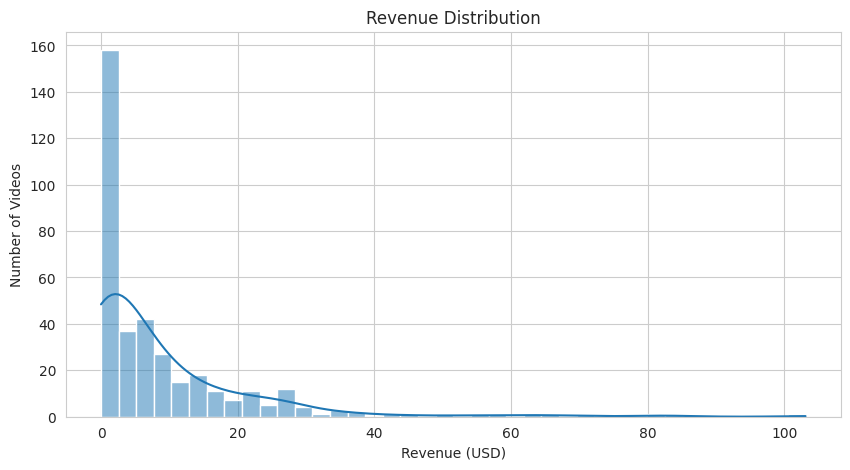

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df['Estimated Revenue (USD)'], bins=40, kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Revenue (USD)")
plt.ylabel("Number of Videos")
plt.show()


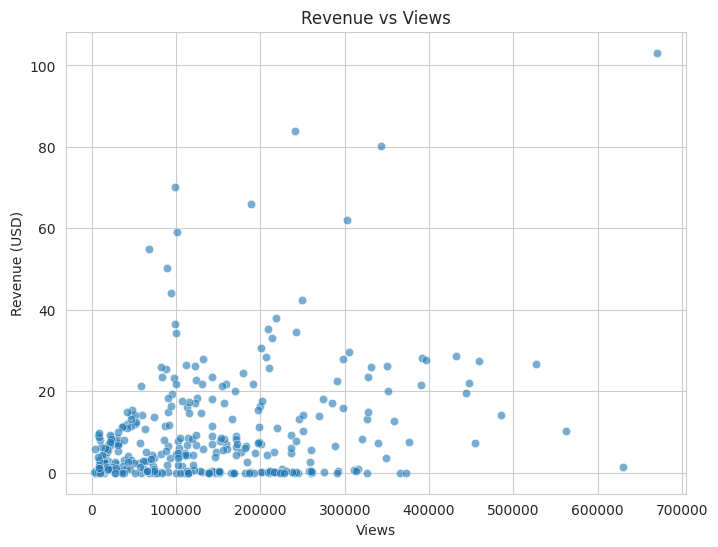

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Views'], y=df['Estimated Revenue (USD)'], alpha=0.6)
plt.title("Revenue vs Views")
plt.xlabel("Views")
plt.ylabel("Revenue (USD)")
plt.show()


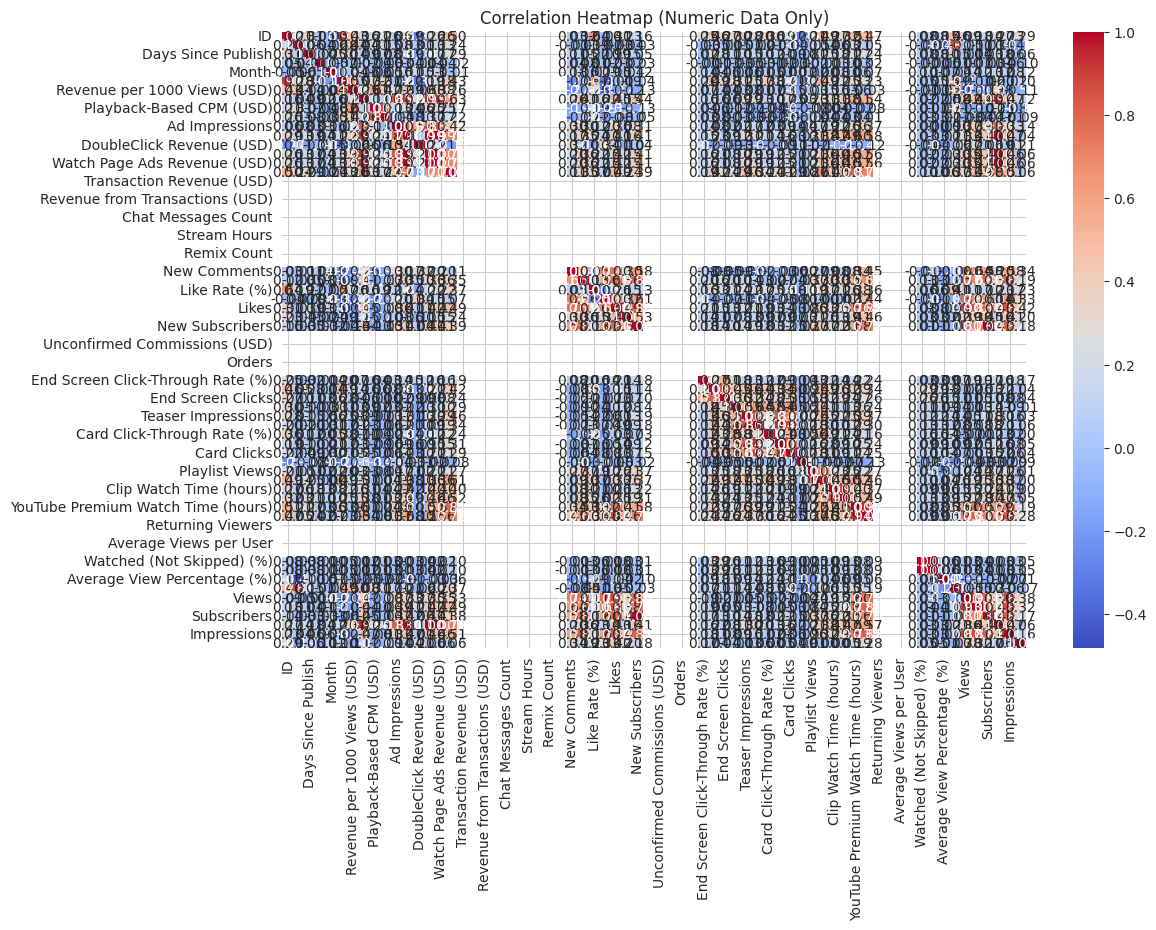

In [10]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64','float64'])

# Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Data Only)")
plt.show()



In [11]:
# Show correlation sorted for revenue
corr = numeric_df.corr()['Estimated Revenue (USD)'].sort_values(ascending=False)
corr


,Estimated Revenue (USD)
Estimated Revenue (USD),1.000000
Watch Page Ads Revenue (USD),0.999493
YouTube Ads Revenue (USD),0.999471
Estimated AdSense Revenue (USD),0.995314
Monetized Playbacks (Estimate),0.944155
...,...
Total Sales Volume (USD),NaN
Returning Viewers,NaN
New Viewers,NaN
Average Views per User,NaN


In [12]:
# Create Engagement Rate
df['Engagement_Rate'] = ((df['Likes'] + df['Shares'] + df['New Comments']) / df['Views']) * 100

# Create Revenue per View (for analysis only)
df['Revenue_per_View'] = df['Estimated Revenue (USD)'] / df['Views']

# Preview
df[['Engagement_Rate', 'Revenue_per_View']].head()


,Engagement_Rate,Revenue_per_View
0,4.364455,0.000024
1,3.153860,0.000056
2,3.949293,0.000014
3,5.434288,0.000004
4,4.495532,0.000000


In [13]:
df.columns


Index(['ID', 'Video Duration', 'Video Publish Time', 'Days Since Publish',
       'Day', 'Month', 'Year', 'Day of Week', 'Revenue per 1000 Views (USD)',
       'Monetized Playbacks (Estimate)', 'Playback-Based CPM (USD)',
       'CPM (USD)', 'Ad Impressions', 'Estimated AdSense Revenue (USD)',
       'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)',
       'Watch Page Ads Revenue (USD)', 'YouTube Premium (USD)',
       'Transaction Revenue (USD)', 'Transactions',
       'Revenue from Transactions (USD)', 'Reactions', 'Chat Messages Count',
       'Reminders Set', 'Stream Hours', 'Remix Views', 'Remix Count',
       'Subscribers from Posts', 'New Comments', 'Shares', 'Like Rate (%)',
       'Dislikes', 'Likes', 'Unsubscribes', 'New Subscribers',
       'Returned Items (USD)', 'Unconfirmed Commissions (USD)',
       'Approved Commissions (USD)', 'Orders', 'Total Sales Volume (USD)',
       'End Screen Click-Through Rate (%)', 'End Screen Impressions',
       'End Screen Clicks', 

In [14]:

# Select safe ML features
features = [
    'Views',
    'Subscribers',
    'Likes',
    'Shares',
    'New Comments',
    'Video Duration',
    'Engagement_Rate',
    'Stream Hours',
    'Days Since Publish'
]

target = 'Estimated Revenue (USD)'

X = df[features]
y = df[target]

# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Show shape
X_train.shape, X_test.shape


((291, 9), (73, 9))

In [15]:
# Train Random Forest Model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=None
)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [16]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 72.37374325213217
R² Score: 0.16875129853745763


In [17]:
# Change target to Views
target = 'Views'

# Features (exclude Views now)
features = [
    'Subscribers',
    'Likes',
    'Shares',
    'New Comments',
    'Video Duration',
    'Engagement_Rate',
    'Stream Hours',
    'Days Since Publish'
]

X = df[features]
y = df[target]

# Train-Test split again
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape


((291, 8), (73, 8))

In [18]:
# Train model again
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)



RandomForestRegressor(n_estimators=200, random_state=42)

In [19]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)


MSE: 827076221.7890466
R²: 0.9504521245496479


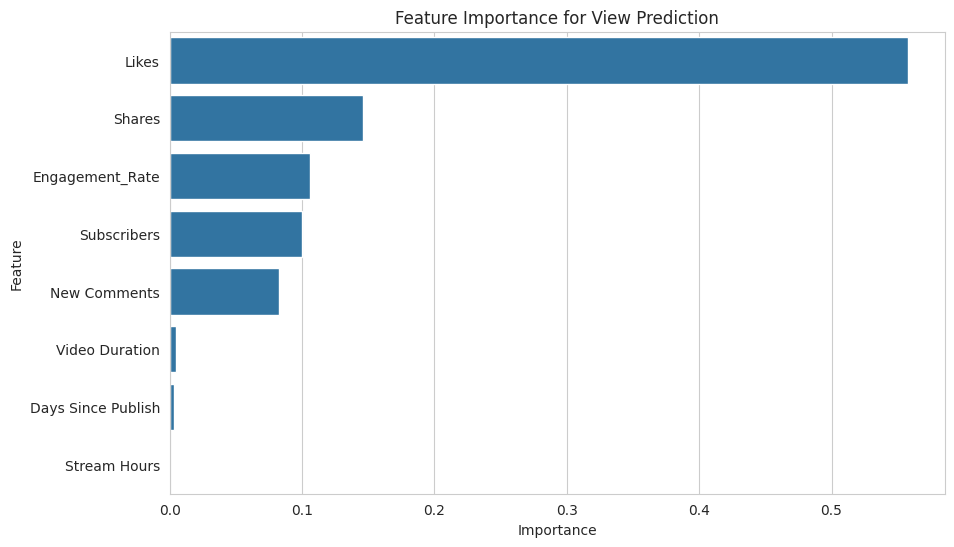

,Feature,Importance
1,Likes,0.557575
2,Shares,0.145713
5,Engagement_Rate,0.105701
0,Subscribers,0.100338
3,New Comments,0.082306
4,Video Duration,0.004945
7,Days Since Publish,0.003423
6,Stream Hours,0.000000


In [20]:
# Feature importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importance = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance for View Prediction")
plt.show()

importance_df


Feature importance analysis revealed that Likes were the most influential predictor of views, contributing more than 55% of decision power, followed by Shares and Engagement Rate. This shows that audience interaction plays a stronger role in visibility than content length or publishing frequency. Interestingly, Video Duration and Stream Hours had negligible influence, suggesting that content quality and interaction outweigh channel activity metrics. Subscriber count, while relevant, was less impactful than post-level engagement. The findings confirm that YouTube’s algorithm favors highly interactive content.

In [21]:
import joblib

joblib.dump(model, "youtube_views_predictor.pkl")


['youtube_views_predictor.pkl']